In [1180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.datasets import make_classification
from sklearn.metrics import precision_score, recall_score, f1_score,confusion_matrix,ConfusionMatrixDisplay,accuracy_score,classification_report,log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [1181]:
Original_df=pd.read_csv('Adult-Census-Income_Dataset.csv')
Original_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [1182]:
Original_df['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

**_Data Cleaning_**


In [1183]:
Cleaned_df=Original_df.copy()

C:\Users\youss\AppData\Local\Temp\ipykernel_47532\2590340679.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Original_df, x=column_name, palette='viridis')


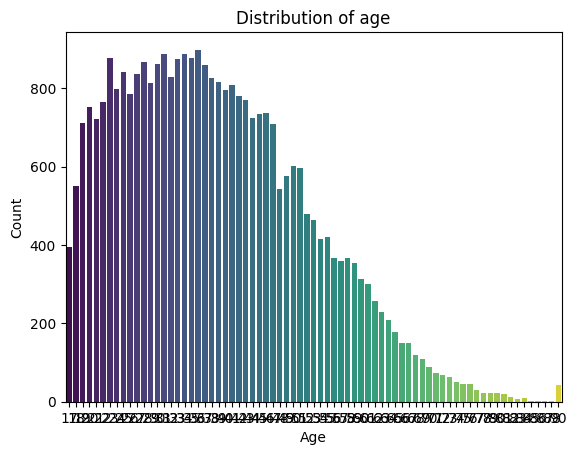

In [1184]:


# Replace 'column_name' with the column you want to visualize
column_name = 'age'

sns.countplot(data=Original_df, x=column_name, palette='viridis')
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name.capitalize())
plt.ylabel('Count')
plt.show()

In [1185]:
Original_df['age'].value_counts()

age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64

In [1186]:
Q1 = Original_df['age'].quantile(0.25)
Q3 = Original_df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = Original_df[(Original_df['age'] < lower_bound) | (Original_df['age'] > upper_bound)]
outlier_count = outliers.shape[0]

print(f"Number of outliers in 'age': {outlier_count}")


Number of outliers in 'age': 143


In [1187]:
Cleaned_df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [1188]:
mode_val=Cleaned_df['workclass'].mode()[0]
Cleaned_df['workclass']=Cleaned_df['workclass'].replace("?",mode_val)
Cleaned_df['workclass'].value_counts()

workclass
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

C:\Users\youss\AppData\Local\Temp\ipykernel_47532\2040775045.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Cleaned_df, x=column_name, palette='viridis')


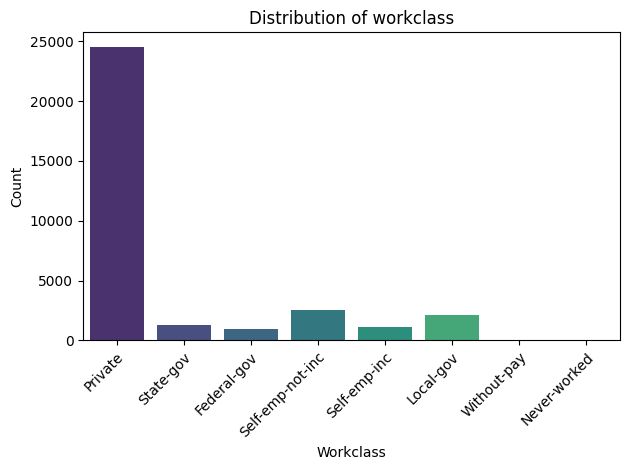

In [1189]:
column_name = 'workclass'

sns.countplot(data=Cleaned_df, x=column_name, palette='viridis')
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name.capitalize())
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.tight_layout()
plt.show()

In [1190]:
Cleaned_df['fnlwgt'].value_counts()

fnlwgt
164190    13
203488    13
123011    13
148995    12
121124    12
          ..
136204     1
172274     1
70037      1
422013     1
216864     1
Name: count, Length: 21648, dtype: int64

In [1191]:
Cleaned_df['fnlwgt'].unique()

array([ 77053, 132870, 186061, ...,  34066,  84661, 257302],
      shape=(21648,))

In [1192]:
Q1 = Cleaned_df['fnlwgt'].quantile(0.25)
Q3 = Cleaned_df['fnlwgt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = Cleaned_df[(Cleaned_df['fnlwgt'] < lower_bound) | (Cleaned_df['fnlwgt'] > upper_bound)]
outlier_count = outliers.shape[0]

print(f"Number of outliers in 'fnlwgt': {outlier_count}")

Number of outliers in 'fnlwgt': 992


In [1193]:
Cleaned_df['fnlwgt'].median()

np.float64(178356.0)

In [1194]:
# lower_bound = Cleaned_df['fnlwgt'].quantile(0.25)
# upper_bound = Cleaned_df['fnlwgt'].quantile(0.75)
# Cleaned_df['fnlwgt'] = Cleaned_df['fnlwgt'].clip(lower=lower_bound, upper=upper_bound)

In [1195]:
# Q1 = Cleaned_df['fnlwgt'].quantile(0.25)
# Q3 = Cleaned_df['fnlwgt'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# outliers = Cleaned_df[(Cleaned_df['fnlwgt'] < lower_bound) | (Cleaned_df['fnlwgt'] > upper_bound)]
# outlier_count = outliers.shape[0]

# print(f"Number of outliers in 'fnlwgt': {outlier_count}")

In [1196]:
#Cleaned_df['fnlwgt'].value_counts()

In [1197]:
Cleaned_df['fnlwgt'].value_counts()

fnlwgt
164190    13
203488    13
123011    13
148995    12
121124    12
          ..
136204     1
172274     1
70037      1
422013     1
216864     1
Name: count, Length: 21648, dtype: int64

In [1198]:
Cleaned_df['education'].unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [1199]:
Cleaned_df['education'].value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [1200]:
Cleaned_df['marital.status'].value_counts()

marital.status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

C:\Users\youss\AppData\Local\Temp\ipykernel_47532\4182344334.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Cleaned_df, x=column_name, palette='viridis')


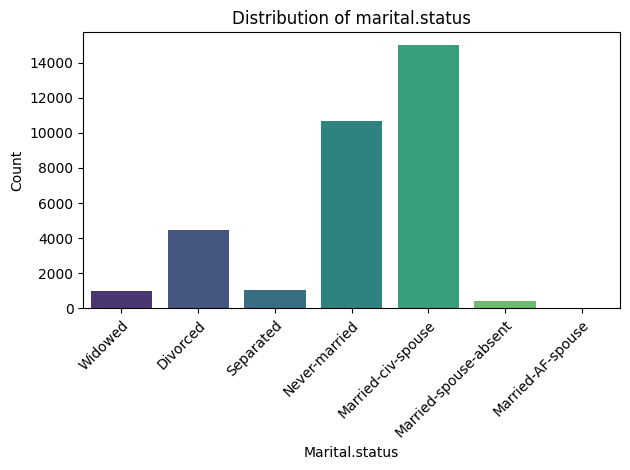

In [1201]:
column_name = 'marital.status'

sns.countplot(data=Cleaned_df, x=column_name, palette='viridis')
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name.capitalize())
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.tight_layout()
plt.show()

In [1202]:
Cleaned_df['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [1203]:
mode_val=Cleaned_df['occupation'].mode()[0]
Cleaned_df['occupation']=Cleaned_df['occupation'].replace("?",mode_val)
Cleaned_df['occupation'].value_counts()

occupation
Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

C:\Users\youss\AppData\Local\Temp\ipykernel_47532\2644380511.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Cleaned_df, x=column_name, palette='viridis')


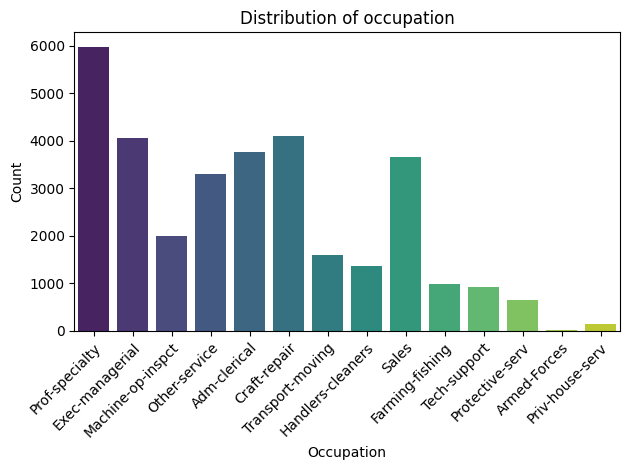

In [1204]:
column_name = 'occupation'

sns.countplot(data=Cleaned_df, x=column_name, palette='viridis')
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name.capitalize())
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.tight_layout()
plt.show()

In [1205]:
Cleaned_df['relationship'].value_counts()

relationship
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64

C:\Users\youss\AppData\Local\Temp\ipykernel_47532\2165771194.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Cleaned_df, x=column_name, palette='viridis')


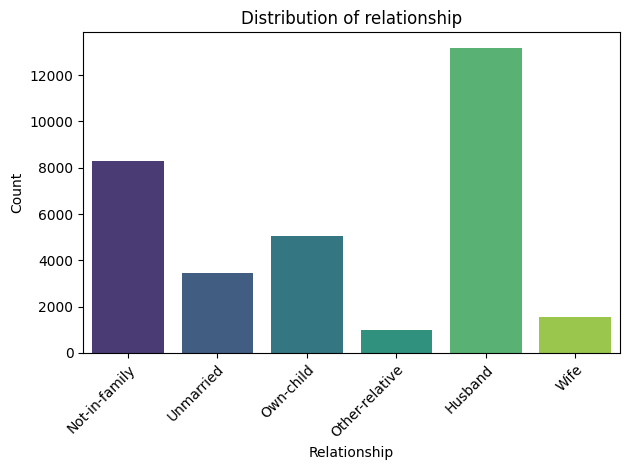

In [1206]:
column_name = 'relationship'

sns.countplot(data=Cleaned_df, x=column_name, palette='viridis')
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name.capitalize())
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.tight_layout()
plt.show()

In [1207]:
Cleaned_df['race'].value_counts()

race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

In [1208]:
Cleaned_df['race'] = Cleaned_df['race'].replace(['Amer-Indian-Eskimo', 'Other'], 'Other')

In [1209]:
Cleaned_df['race'].value_counts()

race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Other                   582
Name: count, dtype: int64

In [1210]:
Cleaned_df['sex'].value_counts()

sex
Male      21790
Female    10771
Name: count, dtype: int64

C:\Users\youss\AppData\Local\Temp\ipykernel_47532\2191004730.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Cleaned_df, x=column_name, palette='viridis')


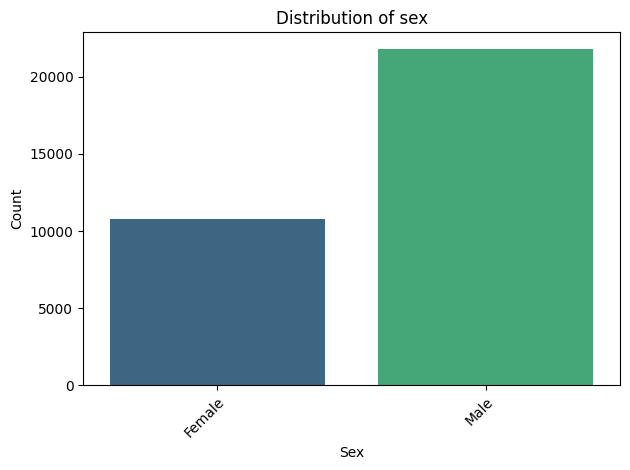

In [1211]:
column_name = 'sex'

sns.countplot(data=Cleaned_df, x=column_name, palette='viridis')
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name.capitalize())
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.tight_layout()
plt.show()

In [1212]:
Cleaned_df['capital.gain'].value_counts()

capital.gain
0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
2538         1
2387         1
1455         1
1639         1
1111         1
Name: count, Length: 119, dtype: int64

In [1213]:
Cleaned_df['capital.loss'].value_counts()

capital.loss
0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
1944        1
2080        1
1539        1
1411        1
155         1
Name: count, Length: 92, dtype: int64

In [1214]:
Cleaned_df['hours.per.week'].value_counts()

hours.per.week
40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
87        1
94        1
82        1
92        1
74        1
Name: count, Length: 94, dtype: int64

In [1215]:
Cleaned_df['hours.per.week'].unique()

array([40, 18, 45, 20, 60, 35, 55, 76, 50, 42, 25, 32, 90, 48, 15, 70, 52,
       72, 39,  6, 65, 12, 80, 67, 99, 30, 75, 26, 36, 10, 84, 38, 62, 44,
        8, 28, 59,  5, 24, 57, 34, 37, 46, 56, 41, 98, 43, 63,  1, 47, 68,
       54,  2, 16,  9,  3,  4, 33, 23, 22, 64, 51, 19, 58, 53, 96, 66, 21,
        7, 13, 27, 11, 14, 77, 31, 78, 49, 17, 85, 87, 88, 73, 89, 97, 94,
       29, 82, 86, 91, 81, 92, 61, 74, 95])

In [1216]:
Q1 = Cleaned_df['hours.per.week'].quantile(0.25)
Q3 = Cleaned_df['hours.per.week'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = Cleaned_df[(Cleaned_df['hours.per.week'] < lower_bound) | (Cleaned_df['hours.per.week'] > upper_bound)]
outlier_count = outliers.shape[0]

print(f"Number of outliers in 'hours.per.week': {outlier_count}")

Number of outliers in 'hours.per.week': 9008


C:\Users\youss\AppData\Local\Temp\ipykernel_47532\83479677.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Cleaned_df, x=column_name, palette='viridis')


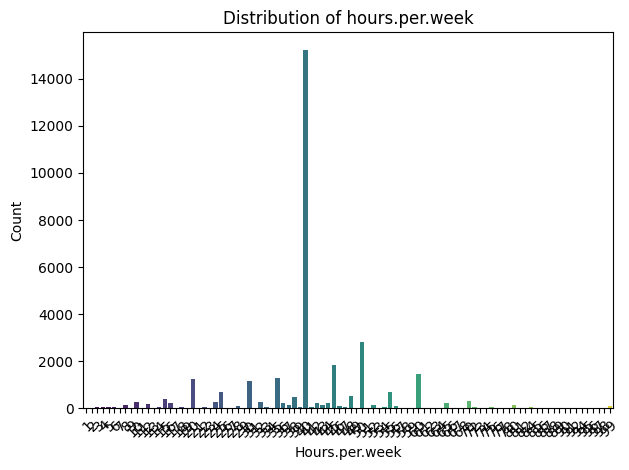

In [1217]:
column_name = 'hours.per.week'

sns.countplot(data=Cleaned_df, x=column_name, palette='viridis')
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name.capitalize())
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.tight_layout()
plt.show()

C:\Users\youss\AppData\Local\Temp\ipykernel_47532\2826704057.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=Cleaned_df, x='hours.per.week', palette='magma')


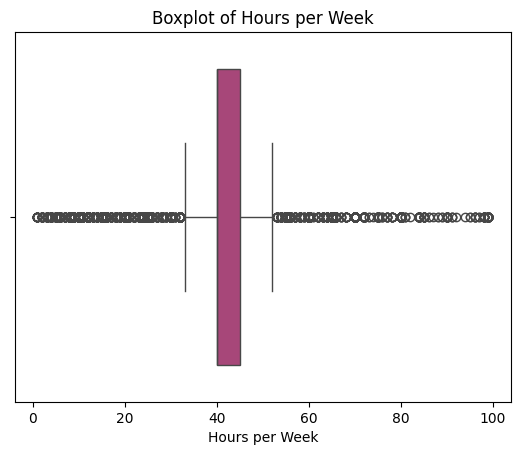

In [1218]:
sns.boxplot(data=Cleaned_df, x='hours.per.week', palette='magma')
plt.title('Boxplot of Hours per Week')
plt.xlabel('Hours per Week')
plt.show()


In [1219]:
Cleaned_df['hours.per.week'].value_counts()

hours.per.week
40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
87        1
94        1
82        1
92        1
74        1
Name: count, Length: 94, dtype: int64

In [1220]:
lower_bound = Cleaned_df['hours.per.week'].quantile(0.05)
upper_bound = Cleaned_df['hours.per.week'].quantile(0.95)
Cleaned_df['hours.per.week'] = Cleaned_df['hours.per.week'].clip(lower=lower_bound, upper=upper_bound)

Q1 = Cleaned_df['hours.per.week'].quantile(0.25)
Q3 = Cleaned_df['hours.per.week'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = Cleaned_df[(Cleaned_df['hours.per.week'] < lower_bound) | (Cleaned_df['hours.per.week'] > upper_bound)]
outlier_count = outliers.shape[0]

print(f"Number of outliers in 'hours.per.week': {outlier_count}")

Number of outliers in 'hours.per.week': 9008


C:\Users\youss\AppData\Local\Temp\ipykernel_47532\2826704057.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=Cleaned_df, x='hours.per.week', palette='magma')


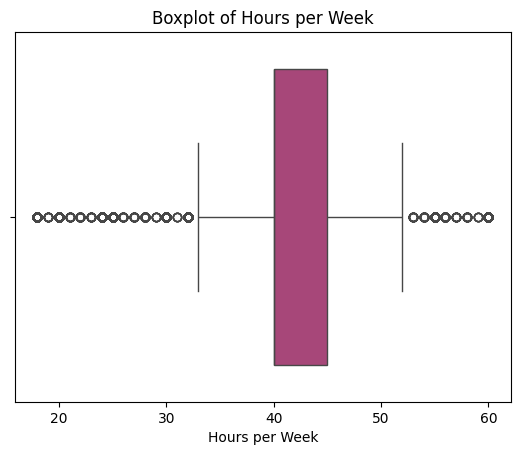

In [1221]:
sns.boxplot(data=Cleaned_df, x='hours.per.week', palette='magma')
plt.title('Boxplot of Hours per Week')
plt.xlabel('Hours per Week')
plt.show()


In [1222]:
Cleaned_df['hours.per.week'].value_counts()

hours.per.week
40    15217
50     2819
60     2585
45     1824
18     1690
35     1297
20     1224
30     1149
55      694
25      674
48      517
38      476
32      266
24      252
36      220
42      219
44      212
43      151
37      149
52      138
56       97
28       86
46       82
47       49
22       44
54       41
33       39
39       38
41       36
27       30
26       30
49       29
58       28
34       28
53       25
21       24
23       21
57       17
19       14
51       13
29        7
59        5
31        5
Name: count, dtype: int64

In [1223]:
# Q1 = Cleaned_df['hours.per.week'].quantile(0.25)
# Q3 = Cleaned_df['hours.per.week'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# outliers = Cleaned_df[(Cleaned_df['hours.per.week'] < lower_bound) | (Cleaned_df['hours.per.week'] > upper_bound)]
# outlier_count = outliers.shape[0]

# print(f"Number of outliers in 'hours.per.week': {outlier_count}")

In [1224]:
# Cleaned_df['hours.per.week'] = Cleaned_df['hours.per.week'].apply(lambda x: min(x, 70))
# Cleaned_df['hours.per.week'] = Cleaned_df['hours.per.week'].apply(lambda x: max(x, 30))
# Q1 = Cleaned_df['hours.per.week'].quantile(0.25)
# Q3 = Cleaned_df['hours.per.week'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# outliers = Cleaned_df[(Cleaned_df['hours.per.week'] < lower_bound) | (Cleaned_df['hours.per.week'] > upper_bound)]
# outlier_count = outliers.shape[0]

# print(f"Number of outliers in 'hours.per.week': {outlier_count}")

In [1225]:
Cleaned_df['native.country'].value_counts()

native.country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece       

In [1226]:
mode_val=Cleaned_df['native.country'].mode()[0]
Cleaned_df['native.country']=Cleaned_df['native.country'].replace("?",mode_val)
Cleaned_df['native.country'].value_counts()

native.country
United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France       

In [1227]:
threshold = 110
country_counts = Cleaned_df['native.country'].value_counts()
countries_to_group_as_other = country_counts[country_counts < threshold].index.tolist()
Cleaned_df['native.country'] = Cleaned_df['native.country'].apply(lambda x: x if x not in countries_to_group_as_other else 'Other')
print(Cleaned_df['native.country'].value_counts())

native.country
United-States    29753
Other             1595
Mexico             643
Philippines        198
Germany            137
Canada             121
Puerto-Rico        114
Name: count, dtype: int64


C:\Users\youss\AppData\Local\Temp\ipykernel_47532\2923637663.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Cleaned_df, x=column_name, palette='viridis')


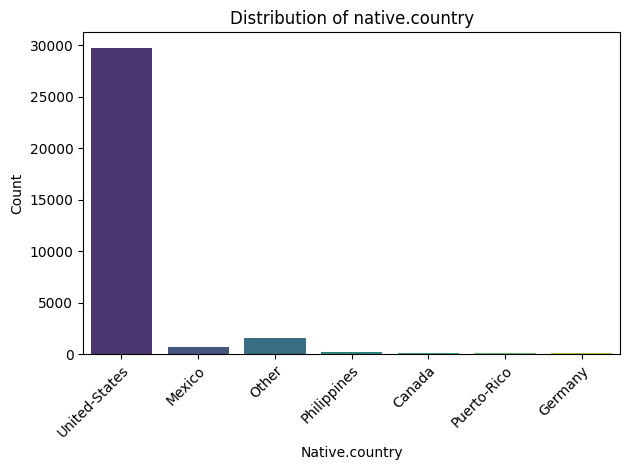

In [1228]:
column_name = 'native.country'

sns.countplot(data=Cleaned_df, x=column_name, palette='viridis')
plt.title(f'Distribution of {column_name}')
plt.xlabel(column_name.capitalize())
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.tight_layout()
plt.show()

In [1229]:
Cleaned_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


**_Grouping_**


In [1230]:
Cleaned_df['workclass'].value_counts()
   

workclass
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [1231]:
Cleaned_df['workclass'] = Cleaned_df['workclass'].replace(['Never-worked', 'Without-pay'], 'Without-pay')

In [1232]:
bins = [0, 100000, 150000, 200000, 250000, 300000, Cleaned_df['fnlwgt'].max()]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High', 'Extremely High']
Cleaned_df['fnlwgt'] = pd.cut(Cleaned_df['fnlwgt'], bins=bins, labels=labels, include_lowest=True)
print(Cleaned_df['fnlwgt'].value_counts())



fnlwgt
Medium            8201
Low               6302
Very Low          5670
High              5235
Extremely High    4412
Very High         2741
Name: count, dtype: int64


In [1233]:
Cleaned_df['fnlwgt']

0              Very Low
1                   Low
2                Medium
3                   Low
4             Very High
              ...      
32556    Extremely High
32557         Very High
32558            Medium
32559            Medium
32560              High
Name: fnlwgt, Length: 32561, dtype: category
Categories (6, object): ['Very Low' < 'Low' < 'Medium' < 'High' < 'Very High' < 'Extremely High']

In [1234]:
Cleaned_df['education'].value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [1235]:
def group_education(level):
    if level in ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th']:
        return 'School'
    elif level in ['HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm']:
        return 'College'
    else:
        return 'After-graduate'

Cleaned_df['education'] = Cleaned_df['education'].apply(group_education)

In [1236]:
Cleaned_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,Very Low,College,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,Low,College,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,Medium,College,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,Low,School,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,Very High,College,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,Extremely High,College,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,Very High,College,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,Medium,College,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,Medium,College,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [1237]:
Cleaned_df['education'].value_counts()

education
College           20241
After-graduate     8067
School             4253
Name: count, dtype: int64

In [1238]:
Cleaned_df.drop(columns=['education.num'],inplace=True)

In [1239]:
# Cleaned_df['education.num'].value_counts()

In [1240]:
# Cleaned_df['education_category'].value_counts()

In [1241]:
Cleaned_df['marital.status'].value_counts()

marital.status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

In [1242]:
marital_status_mapping = {
    'Married-civ-spouse': 'Married',
    'Married-AF-spouse': 'Married',
    'Married-spouse-absent': 'Married',
    'Never-married': 'Single',
    'Divorced': 'Separated',
    'Separated': 'Separated',
    'Widowed': 'Separated'
}

Cleaned_df['marital.status'] = Cleaned_df['marital.status'].map(marital_status_mapping)

print(Cleaned_df['marital.status'].value_counts())


marital.status
Married      15417
Single       10683
Separated     6461
Name: count, dtype: int64


In [1243]:
Cleaned_df['occupation'].value_counts()

occupation
Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [1244]:
occupation_mapping = {
    'Prof-specialty': 'Professional',
    'Exec-managerial': 'Professional',
    'Tech-support': 'Professional',
    'Adm-clerical': 'Sales',
    'Sales': 'Sales',
    'Other-service': 'Others',
    'Protective-serv': 'Others',
    'Priv-house-serv': 'Others',
    'Armed-Forces': 'Others',
    'Craft-repair': 'Blue-Collar',
    'Machine-op-inspct': 'Blue-Collar',
    'Transport-moving': 'Blue-Collar',
    'Handlers-cleaners': 'Blue-Collar',
    'Farming-fishing': 'Blue-Collar'
}

Cleaned_df['occupation'] = Cleaned_df['occupation'].map(occupation_mapping)

# Check the grouped counts
print(Cleaned_df['occupation'].value_counts())


occupation
Professional    10977
Blue-Collar     10062
Sales            7420
Others           4102
Name: count, dtype: int64


In [1245]:
Cleaned_df['relationship'].value_counts()

relationship
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64

**_Data Encoding_**


In [1246]:
Encoded_df=Cleaned_df.copy()

In [1247]:
# def label_encode_column(dataframe, column_name):
#     le = LabelEncoder()
#     dataframe[column_name] = le.fit_transform(dataframe[column_name])
#     return dataframe


In [1248]:
# Encoded_df = label_encode_column(Encoded_df, 'workclass')

In [1249]:
# Encoded_df['workclass'].unique()

In [1250]:
# Encoded_df = label_encode_column(Encoded_df, 'education')

In [1251]:
# Encoded_df['education'].unique()

In [1252]:
# Encoded_df = label_encode_column(Encoded_df, 'marital.status')
# Encoded_df['marital.status'].unique()

In [1253]:
# Encoded_df = label_encode_column(Encoded_df, 'occupation')
# Encoded_df['occupation'].unique()

In [1254]:
# Encoded_df = label_encode_column(Encoded_df, 'relationship')
# Encoded_df['relationship'].unique()

In [1255]:
# Encoded_df = label_encode_column(Encoded_df, 'race')
# Encoded_df['race'].unique()

In [1256]:
# Encoded_df = label_encode_column(Encoded_df, 'sex')
# Encoded_df['sex'].unique()

In [1257]:
# Encoded_df = label_encode_column(Encoded_df, 'native.country')
# Encoded_df['native.country'].unique()

In [1258]:
Encoded_df

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,Very Low,College,Separated,Professional,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,Low,College,Separated,Professional,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,Medium,College,Separated,Professional,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,Low,School,Separated,Blue-Collar,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,Very High,College,Separated,Professional,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,Extremely High,College,Single,Others,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,Very High,College,Married,Professional,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,Medium,College,Married,Blue-Collar,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,Medium,College,Separated,Sales,Unmarried,White,Female,0,0,40,United-States,<=50K


In [1259]:
le_workclass = LabelEncoder()
Encoded_df['workclass'] = le_workclass.fit_transform(Encoded_df['workclass'])

In [1260]:
le_education = LabelEncoder()
Encoded_df['education'] = le_education.fit_transform(Encoded_df['education'])

In [1261]:
le_marital_status = LabelEncoder()
Encoded_df['marital.status'] = le_marital_status.fit_transform(Encoded_df['marital.status'])


In [1262]:
le_occupation = LabelEncoder()
Encoded_df['occupation'] = le_occupation.fit_transform(Encoded_df['occupation'])

In [1263]:
le_relationship = LabelEncoder()
Encoded_df['relationship'] = le_relationship.fit_transform(Encoded_df['relationship'])


In [1264]:
le_race = LabelEncoder()
Encoded_df['race'] = le_race.fit_transform(Encoded_df['race'])

In [1265]:
le_sex = LabelEncoder()
Encoded_df['sex'] = le_sex.fit_transform(Encoded_df['sex'])

In [1266]:
le_native_country = LabelEncoder()
Encoded_df['native.country'] = le_native_country.fit_transform(Encoded_df['native.country'])

In [1267]:
Encoded_df

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,2,Very Low,1,1,2,1,3,0,0,4356,40,6,<=50K
1,82,2,Low,1,1,2,1,3,0,0,4356,18,6,<=50K
2,66,2,Medium,1,1,2,4,1,0,0,4356,40,6,<=50K
3,54,2,Low,2,1,0,4,3,0,0,3900,40,6,<=50K
4,41,2,Very High,1,1,2,3,3,0,0,3900,40,6,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,2,Extremely High,1,2,1,1,3,1,0,0,40,6,<=50K
32557,27,2,Very High,1,0,2,5,3,0,0,0,38,6,<=50K
32558,40,2,Medium,1,0,0,0,3,1,0,0,40,6,>50K
32559,58,2,Medium,1,1,3,4,3,0,0,0,40,6,<=50K


In [1268]:
# Encoded_df['workclass'] = le_workclass.inverse_transform(Encoded_df['workclass'].astype(int))

In [1269]:
# Encoded_df['education'] = le_education.inverse_transform(Encoded_df['education'].astype(int))

In [1270]:
# Encoded_df['marital.status'] = le_marital_status.inverse_transform(Encoded_df['marital.status'].astype(int))


In [1271]:
# Encoded_df['occupation'] = le_occupation.inverse_transform(Encoded_df['occupation'].astype(int))


In [1272]:
# Encoded_df['relationship'] = le_relationship.inverse_transform(Encoded_df['relationship'].astype(int))


In [1273]:
# Encoded_df['race'] = le_race.inverse_transform(Encoded_df['race'].astype(int))


In [1274]:
# Encoded_df['sex'] = le_sex.inverse_transform(Encoded_df['sex'].astype(int))


In [1275]:
# Encoded_df['native.country'] = le_native_country.inverse_transform(Encoded_df['native.country'].astype(int))

In [1276]:
Encoded_df

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,2,Very Low,1,1,2,1,3,0,0,4356,40,6,<=50K
1,82,2,Low,1,1,2,1,3,0,0,4356,18,6,<=50K
2,66,2,Medium,1,1,2,4,1,0,0,4356,40,6,<=50K
3,54,2,Low,2,1,0,4,3,0,0,3900,40,6,<=50K
4,41,2,Very High,1,1,2,3,3,0,0,3900,40,6,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,2,Extremely High,1,2,1,1,3,1,0,0,40,6,<=50K
32557,27,2,Very High,1,0,2,5,3,0,0,0,38,6,<=50K
32558,40,2,Medium,1,0,0,0,3,1,0,0,40,6,>50K
32559,58,2,Medium,1,1,3,4,3,0,0,0,40,6,<=50K


**_Data Normalization_**


In [1277]:
Normalized_df=Encoded_df.copy()
Normalized_df

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,2,Very Low,1,1,2,1,3,0,0,4356,40,6,<=50K
1,82,2,Low,1,1,2,1,3,0,0,4356,18,6,<=50K
2,66,2,Medium,1,1,2,4,1,0,0,4356,40,6,<=50K
3,54,2,Low,2,1,0,4,3,0,0,3900,40,6,<=50K
4,41,2,Very High,1,1,2,3,3,0,0,3900,40,6,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,2,Extremely High,1,2,1,1,3,1,0,0,40,6,<=50K
32557,27,2,Very High,1,0,2,5,3,0,0,0,38,6,<=50K
32558,40,2,Medium,1,0,0,0,3,1,0,0,40,6,>50K
32559,58,2,Medium,1,1,3,4,3,0,0,0,40,6,<=50K


In [1278]:
Normalized_df['age']=((Normalized_df['age']-Normalized_df['age'].min())
                         /(Normalized_df['age'].max()-Normalized_df['age'].min()))
Normalized_df

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,1.000000,2,Very Low,1,1,2,1,3,0,0,4356,40,6,<=50K
1,0.890411,2,Low,1,1,2,1,3,0,0,4356,18,6,<=50K
2,0.671233,2,Medium,1,1,2,4,1,0,0,4356,40,6,<=50K
3,0.506849,2,Low,2,1,0,4,3,0,0,3900,40,6,<=50K
4,0.328767,2,Very High,1,1,2,3,3,0,0,3900,40,6,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.068493,2,Extremely High,1,2,1,1,3,1,0,0,40,6,<=50K
32557,0.136986,2,Very High,1,0,2,5,3,0,0,0,38,6,<=50K
32558,0.315068,2,Medium,1,0,0,0,3,1,0,0,40,6,>50K
32559,0.561644,2,Medium,1,1,3,4,3,0,0,0,40,6,<=50K


In [1279]:
Normalized_df['age']=((Normalized_df['age']-Normalized_df['age'].min())
                         /(Normalized_df['age'].max()-Normalized_df['age'].min()))
Normalized_df

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,1.000000,2,Very Low,1,1,2,1,3,0,0,4356,40,6,<=50K
1,0.890411,2,Low,1,1,2,1,3,0,0,4356,18,6,<=50K
2,0.671233,2,Medium,1,1,2,4,1,0,0,4356,40,6,<=50K
3,0.506849,2,Low,2,1,0,4,3,0,0,3900,40,6,<=50K
4,0.328767,2,Very High,1,1,2,3,3,0,0,3900,40,6,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.068493,2,Extremely High,1,2,1,1,3,1,0,0,40,6,<=50K
32557,0.136986,2,Very High,1,0,2,5,3,0,0,0,38,6,<=50K
32558,0.315068,2,Medium,1,0,0,0,3,1,0,0,40,6,>50K
32559,0.561644,2,Medium,1,1,3,4,3,0,0,0,40,6,<=50K


In [1280]:
# Normalized_df['fnlwgt']=((Normalized_df['fnlwgt']-Normalized_df['fnlwgt'].min())
#                          /(Normalized_df['fnlwgt'].max()-Normalized_df['fnlwgt'].min()))
# Normalized_df

In [1281]:
Normalized_df['capital.loss']=((Normalized_df['capital.loss']-Normalized_df['capital.loss'].min())
                         /(Normalized_df['capital.loss'].max()-Normalized_df['capital.loss'].min()))
Normalized_df

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,1.000000,2,Very Low,1,1,2,1,3,0,0,1.000000,40,6,<=50K
1,0.890411,2,Low,1,1,2,1,3,0,0,1.000000,18,6,<=50K
2,0.671233,2,Medium,1,1,2,4,1,0,0,1.000000,40,6,<=50K
3,0.506849,2,Low,2,1,0,4,3,0,0,0.895317,40,6,<=50K
4,0.328767,2,Very High,1,1,2,3,3,0,0,0.895317,40,6,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.068493,2,Extremely High,1,2,1,1,3,1,0,0.000000,40,6,<=50K
32557,0.136986,2,Very High,1,0,2,5,3,0,0,0.000000,38,6,<=50K
32558,0.315068,2,Medium,1,0,0,0,3,1,0,0.000000,40,6,>50K
32559,0.561644,2,Medium,1,1,3,4,3,0,0,0.000000,40,6,<=50K


In [1282]:
Normalized_df['capital.gain']=((Normalized_df['capital.gain']-Normalized_df['capital.gain'].min())
                         /(Normalized_df['capital.gain'].max()-Normalized_df['capital.gain'].min()))
Normalized_df

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,1.000000,2,Very Low,1,1,2,1,3,0,0.0,1.000000,40,6,<=50K
1,0.890411,2,Low,1,1,2,1,3,0,0.0,1.000000,18,6,<=50K
2,0.671233,2,Medium,1,1,2,4,1,0,0.0,1.000000,40,6,<=50K
3,0.506849,2,Low,2,1,0,4,3,0,0.0,0.895317,40,6,<=50K
4,0.328767,2,Very High,1,1,2,3,3,0,0.0,0.895317,40,6,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.068493,2,Extremely High,1,2,1,1,3,1,0.0,0.000000,40,6,<=50K
32557,0.136986,2,Very High,1,0,2,5,3,0,0.0,0.000000,38,6,<=50K
32558,0.315068,2,Medium,1,0,0,0,3,1,0.0,0.000000,40,6,>50K
32559,0.561644,2,Medium,1,1,3,4,3,0,0.0,0.000000,40,6,<=50K


In [1283]:
Normalized_df['hours.per.week'].unique()
#values ranges is already not too large

array([40, 18, 45, 20, 60, 35, 55, 50, 42, 25, 32, 48, 52, 39, 30, 26, 36,
       38, 44, 28, 59, 24, 57, 34, 37, 46, 56, 41, 43, 47, 54, 33, 23, 22,
       51, 19, 58, 53, 21, 27, 31, 49, 29])

In [1284]:
Normalized_df

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,1.000000,2,Very Low,1,1,2,1,3,0,0.0,1.000000,40,6,<=50K
1,0.890411,2,Low,1,1,2,1,3,0,0.0,1.000000,18,6,<=50K
2,0.671233,2,Medium,1,1,2,4,1,0,0.0,1.000000,40,6,<=50K
3,0.506849,2,Low,2,1,0,4,3,0,0.0,0.895317,40,6,<=50K
4,0.328767,2,Very High,1,1,2,3,3,0,0.0,0.895317,40,6,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.068493,2,Extremely High,1,2,1,1,3,1,0.0,0.000000,40,6,<=50K
32557,0.136986,2,Very High,1,0,2,5,3,0,0.0,0.000000,38,6,<=50K
32558,0.315068,2,Medium,1,0,0,0,3,1,0.0,0.000000,40,6,>50K
32559,0.561644,2,Medium,1,1,3,4,3,0,0.0,0.000000,40,6,<=50K


In [1285]:
Normalized_df['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [1286]:
le_fnlwgt = LabelEncoder()
Normalized_df['fnlwgt'] = le_fnlwgt.fit_transform(Normalized_df['fnlwgt'])

In [1287]:
from sklearn.utils import resample

# Check if both classes are present
majority_class = Normalized_df[Normalized_df['income'] == '<=50K']
minority_class = Normalized_df[Normalized_df['income'] == '>50K']

# Check if both classes exist and are non-empty
if not majority_class.empty and not minority_class.empty:
    # Oversample the minority class to make the dataset imbalanced
    minority_class_oversampled = resample(minority_class, replace=True,  # Sample with replacement
                                          n_samples=len(majority_class),  # Match the majority class size
                                          random_state=42)

    # Combine with the majority class to create an imbalanced dataset
    balanced_df = pd.concat([majority_class, minority_class_oversampled])

    # Check the new distribution
    print(balanced_df['income'].value_counts())
else:
    print("One or both classes are missing or empty.")


income
<=50K    24720
>50K     24720
Name: count, dtype: int64


In [1288]:
balanced_df

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,1.000000,2,5,1,1,2,1,3,0,0.0,1.000000,40,6,<=50K
1,0.890411,2,2,1,1,2,1,3,0,0.0,1.000000,18,6,<=50K
2,0.671233,2,3,1,1,2,4,1,0,0.0,1.000000,40,6,<=50K
3,0.506849,2,2,2,1,0,4,3,0,0.0,0.895317,40,6,<=50K
4,0.328767,2,4,1,1,2,3,3,0,0.0,0.895317,40,6,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17355,0.424658,2,3,0,0,3,0,3,1,0.0,0.000000,35,6,>50K
30931,0.410959,2,2,1,0,3,0,3,1,0.0,0.000000,30,6,>50K
26267,0.410959,2,3,0,0,2,0,3,1,0.0,0.000000,60,6,>50K
30212,0.438356,2,3,0,1,2,4,3,0,0.0,0.000000,40,6,>50K


In [1289]:
Normalized_df['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [1290]:
Normalized_df

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,1.000000,2,5,1,1,2,1,3,0,0.0,1.000000,40,6,<=50K
1,0.890411,2,2,1,1,2,1,3,0,0.0,1.000000,18,6,<=50K
2,0.671233,2,3,1,1,2,4,1,0,0.0,1.000000,40,6,<=50K
3,0.506849,2,2,2,1,0,4,3,0,0.0,0.895317,40,6,<=50K
4,0.328767,2,4,1,1,2,3,3,0,0.0,0.895317,40,6,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.068493,2,0,1,2,1,1,3,1,0.0,0.000000,40,6,<=50K
32557,0.136986,2,4,1,0,2,5,3,0,0.0,0.000000,38,6,<=50K
32558,0.315068,2,3,1,0,0,0,3,1,0.0,0.000000,40,6,>50K
32559,0.561644,2,3,1,1,3,4,3,0,0.0,0.000000,40,6,<=50K


In [1291]:
Normalized_df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [1292]:
le_income = LabelEncoder()
balanced_df['income'] = le_sex.fit_transform(balanced_df['income'])

In [1293]:
balanced_df['income'].value_counts()

income
0    24720
1    24720
Name: count, dtype: int64

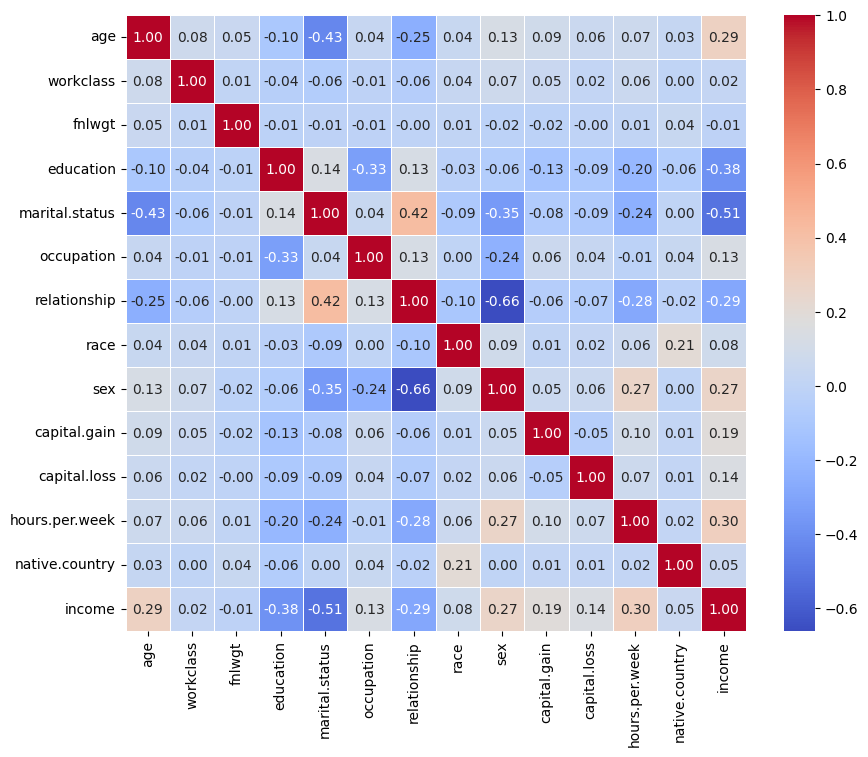

In [1294]:
correlation_matrix = balanced_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)



# Display the heatmap
plt.show()

In [1295]:
#Another Way for calculating Correlation
correlation_matrix = balanced_df.corr(method='pearson')
print(correlation_matrix)

                     age  workclass    fnlwgt  education  marital.status  \
age             1.000000   0.076557  0.046961  -0.100838       -0.432299   
workclass       0.076557   1.000000  0.008630  -0.040020       -0.058797   
fnlwgt          0.046961   0.008630  1.000000  -0.013509       -0.007135   
education      -0.100838  -0.040020 -0.013509   1.000000        0.138895   
marital.status -0.432299  -0.058797 -0.007135   0.138895        1.000000   
occupation      0.037094  -0.010933 -0.007974  -0.329810        0.044228   
relationship   -0.251930  -0.056861 -0.004972   0.127568        0.417854   
race            0.042765   0.039184  0.009182  -0.025993       -0.087639   
sex             0.126392   0.071886 -0.017297  -0.061795       -0.349387   
capital.gain    0.089279   0.051589 -0.015338  -0.129281       -0.076577   
capital.loss    0.058307   0.015426 -0.001937  -0.093176       -0.089609   
hours.per.week  0.069756   0.055106  0.008425  -0.199280       -0.242921   
native.count

In [1296]:
correlation_matrix = balanced_df.corr()
print(correlation_matrix)


                     age  workclass    fnlwgt  education  marital.status  \
age             1.000000   0.076557  0.046961  -0.100838       -0.432299   
workclass       0.076557   1.000000  0.008630  -0.040020       -0.058797   
fnlwgt          0.046961   0.008630  1.000000  -0.013509       -0.007135   
education      -0.100838  -0.040020 -0.013509   1.000000        0.138895   
marital.status -0.432299  -0.058797 -0.007135   0.138895        1.000000   
occupation      0.037094  -0.010933 -0.007974  -0.329810        0.044228   
relationship   -0.251930  -0.056861 -0.004972   0.127568        0.417854   
race            0.042765   0.039184  0.009182  -0.025993       -0.087639   
sex             0.126392   0.071886 -0.017297  -0.061795       -0.349387   
capital.gain    0.089279   0.051589 -0.015338  -0.129281       -0.076577   
capital.loss    0.058307   0.015426 -0.001937  -0.093176       -0.089609   
hours.per.week  0.069756   0.055106  0.008425  -0.199280       -0.242921   
native.count

In [1297]:
# balanced_df['education'] = le_education.inverse_transform(balanced_df['education'].astype(int))
# balanced_df['education'].value_counts()

In [1298]:
# balanced_df['education.num'].value_counts()

C:\Users\youss\AppData\Local\Temp\ipykernel_47532\2556743628.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=balanced_df, x='relationship', y='income', palette='viridis')


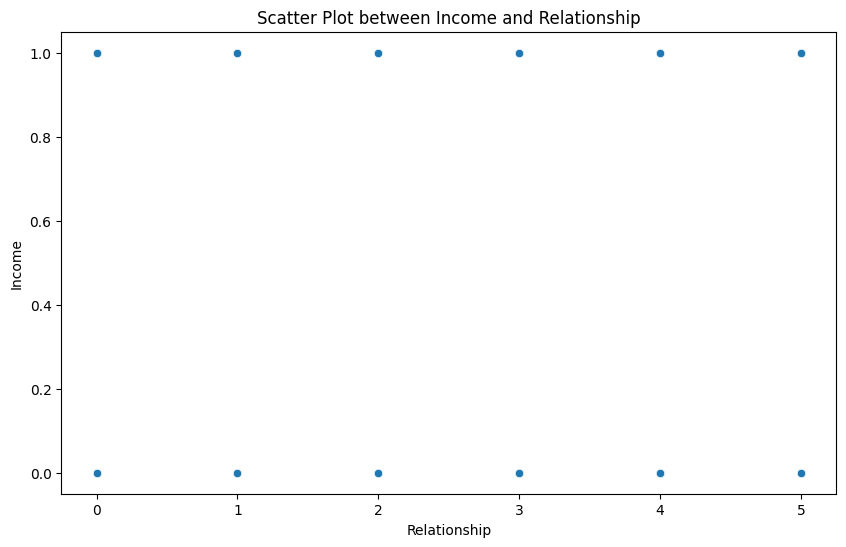

In [1299]:
# Assuming 'balanced_df' is your DataFrame and 'income' and 'relationship' are the relevant columns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=balanced_df, x='relationship', y='income', palette='viridis')
plt.title('Scatter Plot between Income and Relationship')
plt.xlabel('Relationship')
plt.ylabel('Income')
plt.show()


In [1300]:
variances = balanced_df.var()
print(variances)

age                 0.031431
workclass           0.916287
fnlwgt              2.543333
education           0.374010
marital.status      0.706915
occupation          1.227576
relationship        2.672660
race                0.556774
sex                 0.197190
capital.gain        0.011661
capital.loss        0.011932
hours.per.week    100.042728
native.country      0.864580
income              0.250005
dtype: float64


In [1301]:
variances = balanced_df.var()
low_variance_threshold = 0.01  # Define a threshold for variance
low_variance_features = variances[variances < low_variance_threshold].index

print("Low variance features:")
print(low_variance_features)

Low variance features:
Index([], dtype='object')


In [1302]:
#Based on correlation we will drop this columns 
balanced_df = balanced_df.drop(columns=['workclass', 'fnlwgt', 'native.country'])
balanced_df


,age,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,income
0,1.000000,1,1,2,1,3,0,0.0,1.000000,40,0
1,0.890411,1,1,2,1,3,0,0.0,1.000000,18,0
2,0.671233,1,1,2,4,1,0,0.0,1.000000,40,0
3,0.506849,2,1,0,4,3,0,0.0,0.895317,40,0
4,0.328767,1,1,2,3,3,0,0.0,0.895317,40,0
...,...,...,...,...,...,...,...,...,...,...,...
17355,0.424658,0,0,3,0,3,1,0.0,0.000000,35,1
30931,0.410959,1,0,3,0,3,1,0.0,0.000000,30,1
26267,0.410959,0,0,2,0,3,1,0.0,0.000000,60,1
30212,0.438356,0,1,2,4,3,0,0.0,0.000000,40,1


In [1303]:
# variance = balanced_df['income'].var()
# print(variance)


In [1304]:
variances = balanced_df.var()
print(variances)

age                 0.031431
education           0.374010
marital.status      0.706915
occupation          1.227576
relationship        2.672660
race                0.556774
sex                 0.197190
capital.gain        0.011661
capital.loss        0.011932
hours.per.week    100.042728
income              0.250005
dtype: float64


In [1305]:
# variances = balanced_df.var()
# low_variance_threshold = 0.01  # Define a threshold for variance
# low_variance_features = variances[variances < low_variance_threshold].index

# print("Low variance features:")
# print(low_variance_features)

**Data Preperation and Splitting**


In [1306]:
X = balanced_df.drop('income', axis=1)
Y = balanced_df['income']

# We tried in n_samples to use 80,50,200,100 but 100 was the best option in terms of accuracy,precision,recall and F1 score.
X, Y = make_classification(n_samples=100, n_features=13, n_classes=2, random_state=42)

# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

**Decision Tree Training Model**


In [1307]:

dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42,max_depth=3, min_samples_split=10,min_samples_leaf=5)
dt_model.fit(X_train, Y_train)

dt_y_test_pred = dt_model.predict(X_test)
dt_y_train_pred=dt_model.predict(X_train)






**Evaluation of Decision Tree (ID3) training Model**


In [1308]:
dt_train_accuracy=accuracy_score(Y_train,dt_y_train_pred)
dt_test_accuracy = accuracy_score(Y_test, dt_y_test_pred)
dt_precision = precision_score(Y_test, dt_y_test_pred)
dt_recall = recall_score(Y_test, dt_y_test_pred)
dt_f1 = f1_score(Y_test, dt_y_test_pred)
dt_cv_scores = cross_val_score(dt_model, X, Y, cv=5, scoring='accuracy')

print(f"Train Accuracy: {dt_train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {dt_test_accuracy * 100:.2f}%")
print(f'Cross-Validation Scores: {dt_cv_scores}')
print(f'Mean Cross-Validation Accuracy: {np.mean(dt_cv_scores):.4f}')
print(f"Precision: {dt_precision}")
print(f"Recall: {dt_recall}")
print(f"F1-Score: {dt_f1}")





Train Accuracy: 97.14%
Test Accuracy: 90.00%
Cross-Validation Scores: [0.95 0.95 0.85 0.9  0.95]
Mean Cross-Validation Accuracy: 0.9200
Precision: 0.8421052631578947
Recall: 1.0
F1-Score: 0.9142857142857143


**Overfit Check for Decision Tree (ID3) Model**


In [1309]:
dt_train_test_flag=False
dt_meancv_test_flag=False
dt_recall_flag=False
dt_overfit_counter=0

if(dt_train_accuracy-dt_test_accuracy)<0.03:
    dt_train_test_flag=True
    dt_overfit_counter +=1
if(dt_test_accuracy-dt_cv_scores.mean())<0.02:
    dt_meancv_test_flag=True
    dt_overfit_counter+=1
if(1-dt_recall)<0.15:
    dt_recall_flag=True
    dt_overfit_counter+=1

if(dt_overfit_counter>=2):
    print("This Model doesn't overfit") 
else:
    print("This Model overfits")

This Model doesn't overfit


**Visualization of Decision Tree (ID3) training Model**


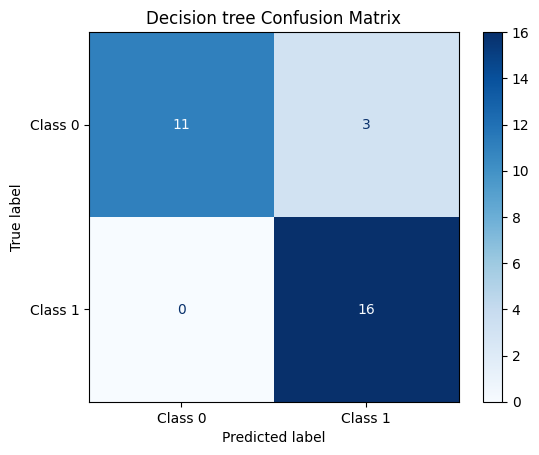

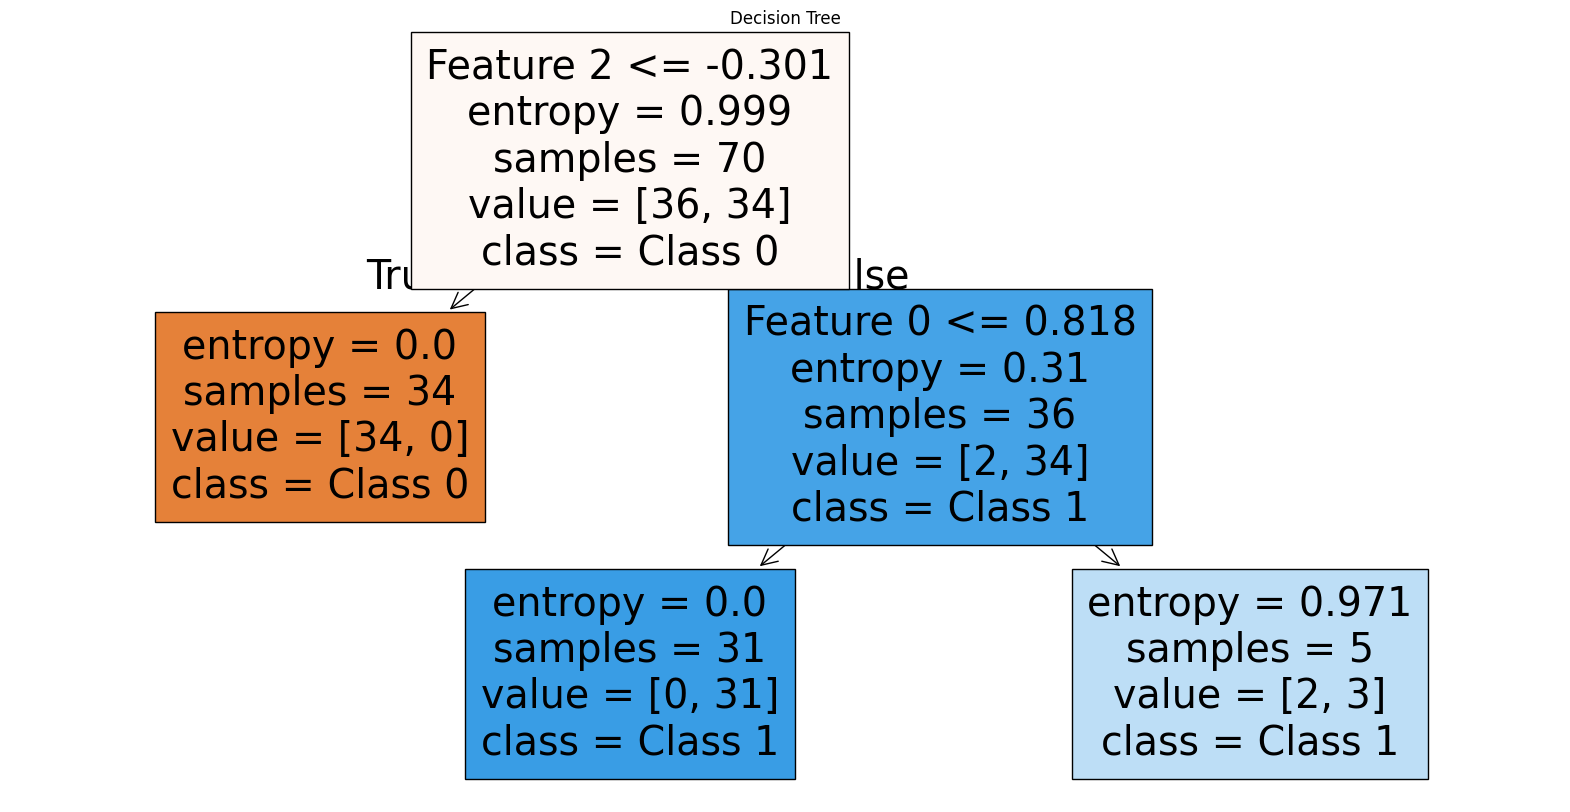

In [1310]:
dt_cm = confusion_matrix(Y_test, dt_y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues)

plt.title("Decision tree Confusion Matrix")
plt.show()

plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=[f"Feature {i}" for i in range(X.shape[1])], class_names=["Class 0", "Class 1"])
plt.title("Decision Tree")
plt.show()


**Logistic Regression training Model**


In [1311]:
lr_model = LogisticRegression(solver='liblinear',C=0.1,random_state=42,max_iter=1000,penalty='l2')
lr_model.fit(X_train, Y_train)
lr_y_train_pred = lr_model.predict(X_train)
lr_y_test_pred = lr_model.predict(X_test)
lr_p_pred = lr_model.predict_proba(X_test)  



**Evaluation of Logistic Regression training Model**


In [1312]:
score = lr_model.score(X_test, Y_test)
lr_log_loss_value = log_loss(Y_test, lr_p_pred)
lr_test_accuracy = accuracy_score(Y_test, lr_y_test_pred)
lr_train_accuracy = accuracy_score(Y_train, lr_y_train_pred)
lr_precision = precision_score(Y_test, lr_y_test_pred)
lr_recall = recall_score(Y_test, lr_y_test_pred)
lr_f1 = f1_score(Y_test, lr_y_test_pred)
lr_cv_scores = cross_val_score(lr_model, X, Y, cv=5, scoring='accuracy')  
print(f"Train Accuracy : {lr_train_accuracy*100:.2f}%")
print(f"Test Accuracy : {lr_test_accuracy*100:.2f}%")
print("Intercept:", lr_model.intercept_)
print("Coefficients:", lr_model.coef_)
print("\nPredicted Classes (y_pred):", lr_y_test_pred, sep='\n')
print(f"Log Loss: {lr_log_loss_value:.4f}")
print(f'Cross-Validation Scores: {lr_cv_scores}')
print(f'Mean Cross-Validation Accuracy: {np.mean(lr_cv_scores):.4f}')
print(f"Precision: {lr_precision}")
print(f"Recall: {lr_recall}")
print(f"F1-Score: {lr_f1}")




Train Accuracy : 97.14%
Test Accuracy : 93.33%
Intercept: [0.04852614]
Coefficients: [[-0.19984184  0.12786852  0.89072509 -0.36201521 -0.1799622  -0.03261796
   0.12030159  0.02327999 -0.06210094  0.03146432 -0.10981686 -0.05624615
  -0.66499145]]

Predicted Classes (y_pred):
[1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0]
Log Loss: 0.2201
Cross-Validation Scores: [1.   0.95 0.95 1.   0.95]
Mean Cross-Validation Accuracy: 0.9700
Precision: 0.8888888888888888
Recall: 1.0
F1-Score: 0.9411764705882353


**Overfit Check for Logistic Regression Model**


In [1313]:
lr_train_test_flag=False
lr_meancv_test_flag=False
lr_recall_flag=False
lr_overfit_counter=0

if (lr_train_accuracy-lr_test_accuracy)<0.03:
    lr_train_test_flag=True
    lr_overfit_counter +=1
if (lr_test_accuracy-lr_cv_scores.mean())<0.02:
    lr_meancv_test_flag=True
    lr_overfit_counter+=1
if(1-lr_recall)<0.15:
    lr_recall_flag=True
    lr_overfit_counter+=1

if(lr_overfit_counter>=2):
    print("This Model doesn't overfit") 
else:
    print("This Model overfits")

This Model doesn't overfit


**Visualization of Logistic Regression training Model**


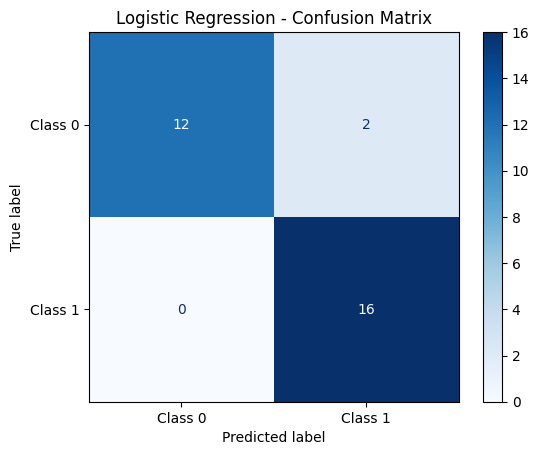


Test Classification Report (report):
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.89      1.00      0.94        16

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30


Train Classification Report (report):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        36
           1       0.97      0.97      0.97        34

    accuracy                           0.97        70
   macro avg       0.97      0.97      0.97        70
weighted avg       0.97      0.97      0.97        70



In [1314]:
lr_cm = confusion_matrix(Y_test, lr_y_test_pred)
lr_disp = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=["Class 0", "Class 1"])
lr_disp.plot(cmap=plt.cm.Blues)
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

lr_test_report = classification_report(Y_test, lr_y_test_pred)
print("\nTest Classification Report (report):", lr_test_report, sep='\n')

lr_train_report = classification_report(Y_train, lr_y_train_pred)
print("\nTrain Classification Report (report):", lr_train_report, sep='\n')

**Support Vector Machine (SVM) training Model**


In [1315]:
svm_model = SVC(kernel='rbf', probability=True, C=0.1, gamma='scale', random_state=42)
svm_model.fit(X_train, Y_train)

svm_y_test_pred = svm_model.predict(X_test)
svm_y_test_pred_proba = svm_model.predict_proba(X_test)

svm_y_train_pred = svm_model.predict(X_train)

**Evaluation of Support Vector Machine (SVM) training Model**


In [1316]:
svm_test_accuracy = accuracy_score(Y_test, svm_y_test_pred)
svm_train_accuracy=accuracy_score(Y_train,svm_y_train_pred)
svm_report = classification_report(Y_test, svm_y_test_pred)
svm_log_loss_value = log_loss(Y_test, svm_y_test_pred_proba)
svm_precision = precision_score(Y_test, svm_y_test_pred)
svm_recall = recall_score(Y_test, svm_y_test_pred)
svm_f1 = f1_score(Y_test, svm_y_test_pred)
svm_cv_scores = cross_val_score(svm_model, X, Y, cv=5, scoring='accuracy')  
print(f"Train Accuracy : {svm_train_accuracy*100:.2f}%")
print(f"Test Accuracy : {svm_test_accuracy*100:.2f}%")
print(f"Precision: {svm_precision}")
print(f"Recall: {svm_recall}")
print(f"F1-Score: {svm_f1}")
print("Log Loss:", svm_log_loss_value)
print("Cross validation : ",svm_cv_scores )
print(f'Mean Cross-Validation Accuracy: {np.mean(svm_cv_scores):.4f}')
print("\nClassification Report:\n", svm_report)

Train Accuracy : 78.57%
Test Accuracy : 80.00%
Precision: 1.0
Recall: 0.625
F1-Score: 0.7692307692307693
Log Loss: 0.23609789014906474
Cross validation :  [0.95 1.   0.85 1.   0.95]
Mean Cross-Validation Accuracy: 0.9500

Classification Report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.82        14
           1       1.00      0.62      0.77        16

    accuracy                           0.80        30
   macro avg       0.85      0.81      0.80        30
weighted avg       0.86      0.80      0.79        30



**Overfit Check for Support Vector Machine (SVM) Model**


In [1317]:
svm_train_test_flag=False
svm_meancv_test_flag=False
svm_recall_flag=False
svm_overfit_counter=0

if(svm_train_accuracy-svm_test_accuracy)<0.03:
    svm_train_test_flag=True
    svm_overfit_counter +=1
if (svm_test_accuracy-svm_cv_scores.mean())<0.02:
    svm_meancv_test_flag=True
    svm_overfit_counter+=1
if(1-svm_recall)<0.15:
    svm_recall_flag=True
    svm_overfit_counter+=1

if(svm_overfit_counter>=2):
    print("This Model doesn't overfit") 
else:
    print("This Model overfits")

This Model doesn't overfit


**Visualization of Support Vector Machine (SVM) training Model**


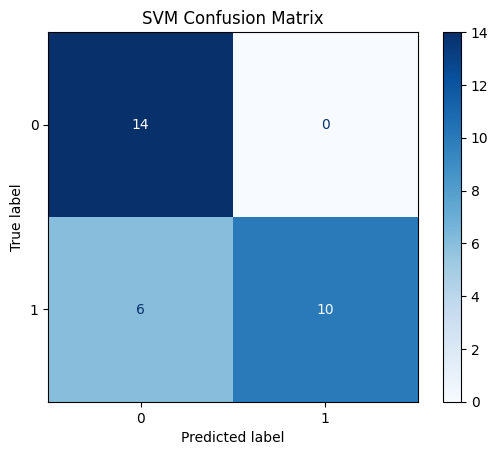

In [1318]:
svm_conf_matrix = confusion_matrix(Y_test, svm_y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=svm_conf_matrix, display_labels=svm_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("SVM Confusion Matrix")
plt.show()

**K-Nearest Neighbors (KNN) training Model**


In [1319]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, Y_train)

knn_y_train_pred = knn_model.predict(X_train)
knn_y_test_pred = knn_model.predict(X_test)
knn_Ytest_Ppred = knn_model.predict_proba(X_test)


**Evaluation of K-Nearest Neighbors(KNN) training Model**


In [1320]:
knn_test_accuracy = accuracy_score(Y_test, knn_y_test_pred)
knn_train_accuracy = accuracy_score(Y_train, knn_y_train_pred)
knn_precision = precision_score(Y_test,knn_y_test_pred)
knn_recall = recall_score(Y_test,knn_y_test_pred)
knn_f1 = f1_score(Y_test,knn_y_test_pred)
knn_log_loss_value = log_loss(Y_test, knn_Ytest_Ppred)
knn_test_report = classification_report(Y_test,knn_y_test_pred)
knn_train_report = classification_report(Y_train, knn_y_train_pred)

print(f"Precision: {knn_precision}")
print(f"Recall: {knn_recall}")
print(f"F1-Score: {knn_f1}")
print("Log Loss:", knn_log_loss_value)
print("Accuracy of test :",knn_test_accuracy)
print(f"Test Accuracy : {knn_test_accuracy*100:.2f}%")
print(f"Train Accuracy : {knn_train_accuracy*100:.2f}%")
print("\nTest Classification Report (report):",knn_test_report, sep='\n')
print("\nTrain Classification Report (report):", knn_train_report, sep='\n')

Precision: 0.9375
Recall: 0.9375
F1-Score: 0.9375
Log Loss: 0.1948803516769901
Accuracy of test : 0.9333333333333333
Test Accuracy : 93.33%
Train Accuracy : 94.29%

Test Classification Report (report):
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.94      0.94      0.94        16

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Train Classification Report (report):
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        36
           1       0.94      0.94      0.94        34

    accuracy                           0.94        70
   macro avg       0.94      0.94      0.94        70
weighted avg       0.94      0.94      0.94        70



In [1321]:
# Cross-Validation
#knn_cv_scores = cross_val_score(knn_model, X, Y, cv=3, scoring='accuracy')

#print(f'Cross-Validation Scores: {knn_cv_scores}')
#print(f'Mean Cross-Validation Accuracy: {np.mean(knn_cv_scores):.4f}')

In [1322]:
#Check which k is the most optimal to choose
best_k = 1
best_score = 0

for k in range(1, 21):  # Search for k from 1 to 20
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5, scoring='accuracy')
    mean_score = np.mean(scores)
    print(f'k: {k}, Cross-Validation Accuracy: {mean_score:.4f}')
    if mean_score > best_score:
        best_k = k
        best_score = mean_score

print(f'\nOptimal k: {best_k}, Best CV Accuracy: {best_score:.4f}')

k: 1, Cross-Validation Accuracy: 0.8600
k: 2, Cross-Validation Accuracy: 0.9000
k: 3, Cross-Validation Accuracy: 0.9000
k: 4, Cross-Validation Accuracy: 0.9300
k: 5, Cross-Validation Accuracy: 0.9100
k: 6, Cross-Validation Accuracy: 0.9300
k: 7, Cross-Validation Accuracy: 0.9200
k: 8, Cross-Validation Accuracy: 0.9400
k: 9, Cross-Validation Accuracy: 0.9400
k: 10, Cross-Validation Accuracy: 0.9300
k: 11, Cross-Validation Accuracy: 0.9300
k: 12, Cross-Validation Accuracy: 0.9400
k: 13, Cross-Validation Accuracy: 0.9200
k: 14, Cross-Validation Accuracy: 0.9200
k: 15, Cross-Validation Accuracy: 0.9200
k: 16, Cross-Validation Accuracy: 0.9100
k: 17, Cross-Validation Accuracy: 0.9100
k: 18, Cross-Validation Accuracy: 0.9200
k: 19, Cross-Validation Accuracy: 0.9200
k: 20, Cross-Validation Accuracy: 0.9200

Optimal k: 8, Best CV Accuracy: 0.9400


**Visualization of K-Nearest Neighbors(KNN) training Model**


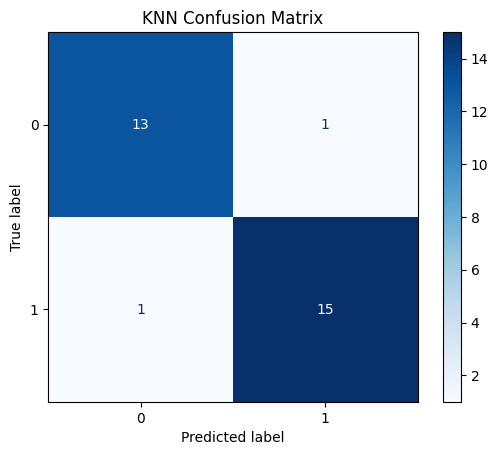

In [1323]:
knn_conf_matrix = confusion_matrix(Y_test,knn_y_test_pred)
knn_display = ConfusionMatrixDisplay(confusion_matrix=knn_conf_matrix, display_labels=knn_model.classes_)
knn_display.plot(cmap=plt.cm.Blues)
plt.title("KNN Confusion Matrix")
plt.show()

**Saving Models as PKL files**


In [1324]:
import pickle

# Save Decision Tree model
with open('models/decision_tree_model.pkl', 'wb') as file:
    pickle.dump(dt_model, file)

# Save Logistic Regression model
with open('models/logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(lr_model, file)

# Save SVM model
with open('models/svm_model.pkl', 'wb') as file:
    pickle.dump(svm_model, file)

# Save KNN model
with open('models/knn_model.pkl', 'wb') as file:
    pickle.dump(knn_model, file)

# Save X_test and Y_test
with open('models/X_test.pkl', 'wb') as file:
    pickle.dump(X_test, file)

with open('models/Y_test.pkl', 'wb') as file:
    pickle.dump(Y_test, file)

**Encoding data**


In [1325]:
import pickle
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Define label encoders for categorical features
label_encoders = {
    "workclass": LabelEncoder(),
    "fnlwgt": LabelEncoder(),
    "education": LabelEncoder(),
    "marital.status": LabelEncoder(),
    "occupation": LabelEncoder(),
    "relationship": LabelEncoder(),
    "race": LabelEncoder(),
    "sex": LabelEncoder(),
    "native.country": LabelEncoder()
}

# Fit the label encoders on the cleaned DataFrame
for column, encoder in label_encoders.items():
    label_encoders[column].fit(Cleaned_df[column])

# Save label encoders to a file
with open('models/label_encoders.pkl', 'wb') as file:
    pickle.dump(label_encoders, file)

print("Label encoders saved successfully.")

# Define scalers for numerical features (use exact column names)
scalers = {
    "age": MinMaxScaler(), 
    "capital.gain": MinMaxScaler(),  # Ensure this matches Cleaned_df column name
    "capital.loss": MinMaxScaler(),  # Ensure this matches Cleaned_df column name
}

# Fit the scalers on the cleaned DataFrame
for column, scaler in scalers.items():
    if column in Cleaned_df.columns:  # Check if column exists in DataFrame
        scalers[column].fit(Cleaned_df[[column]])
    else:
        print(f"Column '{column}' not found in Cleaned_df. Skipping.")

# Save scalers to a file
with open('models/scalers.pkl', 'wb') as file:
    pickle.dump(scalers, file)

print("Scalers saved successfully.")

Label encoders saved successfully.
Scalers saved successfully.
